In [20]:
path = 'HCMST 2017 fresh sample for public sharing draft v1.1.dta'
import pandas as pd
data = pd.read_stata(path)

## Data preparation

In [21]:
data.head()

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
0,2,2014039,Qualified,NaN,NaN,0.8945,NaN,NaN,0.277188,19240.0,...,no,no,no,no,White,no,12.0,14.0,12.0,14.0
1,3,2019003,Qualified,0.9078,71115.0,NaN,0.9026,70707.0,1.020621,70841.0,...,no,no,no,yes,White,no,12.0,16.0,17.0,17.0
2,5,2145527,Qualified,0.7205,56442.0,NaN,0.7164,56121.0,0.810074,56227.0,...,no,no,no,no,White,no,9.0,7.5,14.0,17.0
3,6,2648857,Qualified,1.2597,98682.0,1.3507,1.2524,98110.0,0.418556,29052.0,...,no,no,no,no,White,no,16.0,12.0,12.0,12.0
4,7,2623465,Qualified,0.8686,68044.0,NaN,0.8636,67652.0,0.976522,67781.0,...,no,no,yes,no,White,no,14.0,17.0,16.0,16.0


In [22]:
data.columns

Index(['CaseID', 'CASEID_NEW', 'qflag', 'weight1', 'weight1_freqwt', 'weight2',
       'weight1a', 'weight1a_freqwt', 'weight_combo', 'weight_combo_freqwt',
       ...
       'hcm2017q24_met_through_family', 'hcm2017q24_met_through_friend',
       'hcm2017q24_met_through_as_nghbrs', 'hcm2017q24_met_as_through_cowork',
       'w6_subject_race', 'interracial_5cat', 'partner_mother_yrsed',
       'subject_mother_yrsed', 'partner_yrsed', 'subject_yrsed'],
      dtype='object', length=285)

In [23]:
y = data['S1']
y.value_counts()

Yes, I am Married       2085
No, I am not Married    1425
Name: S1, dtype: int64

In [24]:
x = data.drop(['S1'], inplace=False, axis=1)
x.head()

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
0,2,2014039,Qualified,NaN,NaN,0.8945,NaN,NaN,0.277188,19240.0,...,no,no,no,no,White,no,12.0,14.0,12.0,14.0
1,3,2019003,Qualified,0.9078,71115.0,NaN,0.9026,70707.0,1.020621,70841.0,...,no,no,no,yes,White,no,12.0,16.0,17.0,17.0
2,5,2145527,Qualified,0.7205,56442.0,NaN,0.7164,56121.0,0.810074,56227.0,...,no,no,no,no,White,no,9.0,7.5,14.0,17.0
3,6,2648857,Qualified,1.2597,98682.0,1.3507,1.2524,98110.0,0.418556,29052.0,...,no,no,no,no,White,no,16.0,12.0,12.0,12.0
4,7,2623465,Qualified,0.8686,68044.0,NaN,0.8636,67652.0,0.976522,67781.0,...,no,no,yes,no,White,no,14.0,17.0,16.0,16.0


### Choosing ge

In [25]:
features = ["Q9", "Q16", "w6_sex_frequency", "partner_yrsed", "ppagecat"]

* Q9 - partner's age
* Q16 - relatives seen
* partnet_yrsed - partner's educational attainment
* ppagecat - age

In [26]:
x = x[features]

In [27]:
x = x.rename(index=str, columns={
    "Q9": "partner_age",
    "Q16": "relatives_seen",
    "w6_sex_frequency": "sex_frequency",
    "partner_yrsed": "educational_attainment",
    "ppagecat": "age"
})

In [28]:
x.head()

,partner_age,relatives_seen,sex_frequency,educational_attainment,age
0,NaN,NaN,NaN,12.0,25-34
1,52,1.0,Once a month or less,17.0,55-64
2,45,0.0,2 to 3 times a month,14.0,45-54
3,NaN,NaN,NaN,12.0,25-34
4,59,0.0,3 to 6 times a week,16.0,55-64


In [29]:
for f in x.columns:
    print("\n################ {} ##########\n".format(f))
    print(x[f].value_counts(dropna=False))


################ partner_age ##########

NaN        654
55.0        79
60.0        73
58.0        70
62.0        66
27.0        64
53.0        64
29.0        63
37.0        63
52.0        63
30.0        62
56.0        61
63.0        60
26.0        60
34.0        58
65.0        58
59.0        57
28.0        56
61.0        56
49.0        55
46.0        54
42.0        54
50.0        53
57.0        53
45.0        51
36.0        50
38.0        50
64.0        50
54.0        49
51.0        48
          ... 
22.0        29
74.0        28
21.0        25
24.0        24
23.0        24
73.0        23
Refused     21
78.0        19
76.0        19
79.0        17
77.0        13
18.0        12
20.0        12
80.0        11
81.0         8
19.0         7
84.0         7
83.0         7
82.0         3
91.0         3
85.0         3
86.0         3
90.0         2
17.0         2
87.0         1
95.0         1
16.0         1
14.0         1
10.0         1
89.0         1
Name: partner_age, Length: 80, dtype: int64

In [30]:
x = x[-pd.isna(x['educational_attainment'])]

In [31]:
x = x[-pd.isna(x['partner_age'])]

In [32]:
x = x[x['partner_age'] != 'Refused']

In [33]:
x = x[-pd.isna(x['relatives_seen'])]

In [34]:
x = x[-pd.isna(x['sex_frequency'])]

In [35]:
x = x[x['sex_frequency'] != 'Refused']

In [36]:
len(x)

2663

In [37]:
x.head()

,partner_age,relatives_seen,sex_frequency,educational_attainment,age
1,52,1.0,Once a month or less,17.0,55-64
2,45,0.0,2 to 3 times a month,14.0,45-54
4,59,0.0,3 to 6 times a week,16.0,55-64
5,60,0.0,Once a month or less,16.0,55-64
6,67,0.0,Once a month or less,13.0,65-74


In [38]:
x['partner_age'] = x['partner_age'].astype('float')

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['educational_attainment', 'relatives_seen', 'partner_age']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['age', 'sex_frequency']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Train model

In [40]:
from xgboost import XGBClassifier

In [41]:
x.head()

,partner_age,relatives_seen,sex_frequency,educational_attainment,age
1,52.0,1.0,Once a month or less,17.0,55-64
2,45.0,0.0,2 to 3 times a month,14.0,45-54
4,59.0,0.0,3 to 6 times a week,16.0,55-64
5,60.0,0.0,Once a month or less,16.0,55-64
6,67.0,0.0,Once a month or less,13.0,65-74


In [42]:
valid_rows = [int(row) for row in x.index]
y = y[valid_rows]

In [43]:
print(x.shape, y.shape)

(2663, 5) (2663,)


In [44]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)

In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
rf_clf = Pipeline(steps=[('preprocessor', preprocessor), ('clf', RandomForestClassifier(n_estimators=20))])
linear_clf = Pipeline(steps=[('preprocessor', preprocessor), ('linear', LogisticRegression())])
svm_clf = Pipeline(steps=[('preprocessor', preprocessor), ('svm', SVC(probability=True))])

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [137]:
rf_clf = rf_clf.fit(X_train, y_train)
linear_clf = linear_clf.fit(X_train, y_train)
svm_clf = svm_clf.fit(X_train, y_train)

/home/michal/Desktop/xai_mim/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/michal/Desktop/xai_mim/venv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Reszty vs wynik modelu

In [138]:
y_hat = rf_clf.predict_proba(X_train)[::, 1]
diff = np.array(y_train == rf_clf.classes_[1]) - np.array(y_hat)

In [172]:
from pygam import LinearGAM

In [174]:
gam = LinearGAM().fit(y_hat, diff)

In [177]:
gam.predict(y_hat)

array([6.10712524e-06, 6.10712524e-06, 6.10712524e-06, ...,
       1.27329802e-05, 1.27329802e-05, 1.27329802e-05])

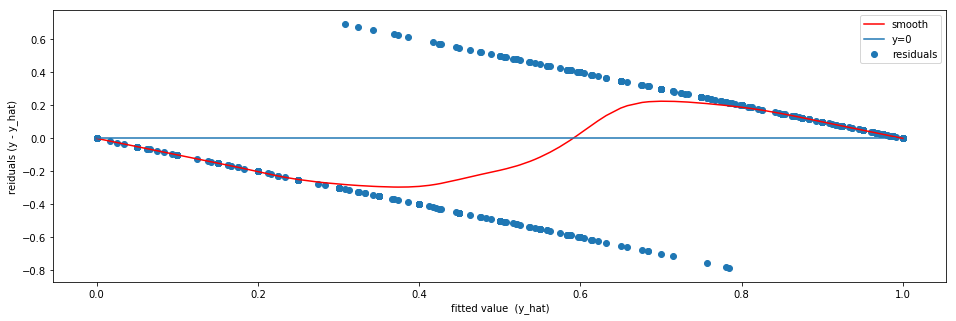

In [182]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(16, 5))
plt.scatter(y_hat, diff, label='residuals')
plt.plot(y_hat, gam.predict(y_hat), 'r', label='smooth')
plt.plot(np.arange(100) / 100, np.zeros((100,)), label='y=0')
plt.xlabel('fitted value  (y_hat)')
plt.ylabel('reiduals (y - y_hat)')
plt.legend()

Mamy dwie grupy punktów odpowiadające naszym klasom (married/not married). Idealnie byłoby gdyby punkty skupiały się w dwóch miejscach (0, 0) i (1, 0). Za błędnie sklasyfikowane uznajemy wartości w lewej górnej ćwiartce i prawej dolnej (abs(err) > 0.5).
Widzimy, że wygładzona krzywa nie jest bliska `y=0`, ale w przypadku klasyfikacji to chyba nawet dobrze (??) - brak wartości `(eps, 1)` powoduje, że krzywa na początku spada poniżej zera, ale to oznacza, że gdy model podaje małe prawdopodobieństwo to się nie myli co do klasy. 

### Reszty vs zmienna `partner_age`

In [184]:
gam = LinearGAM().fit(X_train['partner_age'], diff)

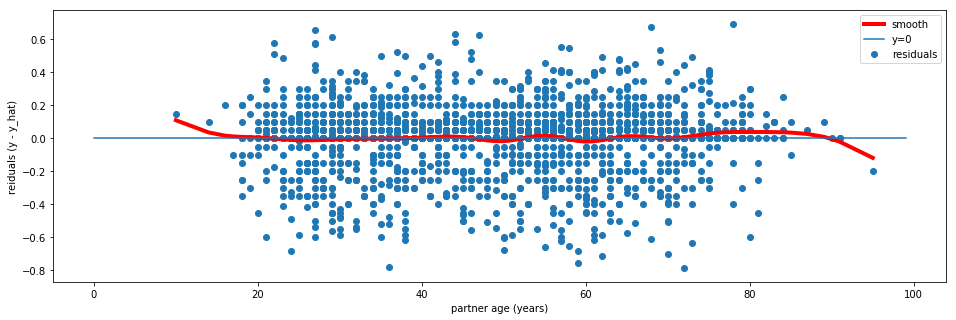

In [190]:
plt.figure(figsize=(16, 5))
plt.scatter(X_train['partner_age'], diff, label='residuals')
plt.plot(sorted(X_train['partner_age']), gam.predict(sorted(X_train['partner_age'])), 'r', label='smooth',
        linewidth=4)
plt.plot(np.arange(100), np.zeros((100,)), label='y=0')
plt.xlabel('partner age (years)')
plt.ylabel('reiduals (y - y_hat)')
plt.legend()

Model popełnia podobne błędy dla wszystkich grup wiekowych - średni błęd jest bardzo bliski zera. Widzimy, że model obarczony jest bardziej zauważalnym średnim błędem na brzegach, czyli w miejscach, w których miał mniej punktów treningowych. Zatem predykcje dla ludzi bardzo młodych i bardzo starych będą systematycznie obciążone błędem.

### Wpływowe obserwacje - Cook's distance

In [150]:
def train_model(i):
    new_model = rf_clf = Pipeline(steps=[('preprocessor', preprocessor), ('clf', RandomForestClassifier(n_estimators=20))])
    indices = [True for _ in range(X_train.shape[0])]
    indices[i] = False
    new_model.fit(X_train[indices], y_train[indices])
    return new_model

In [164]:
import numpy as np
def compare_model(model1, model2):
    preds1 = model1.predict_proba(X_test)[::, 1]
    preds2 = model2.predict_proba(X_test)[::, 1]
    return np.sqrt(np.mean((preds1 - preds2) ** 2) / len(preds1))

In [165]:
n_obs = len(X_train)

In [166]:
cook_dists = [compare_model(rf_clf, train_model(i)) for i in range(n_obs)]

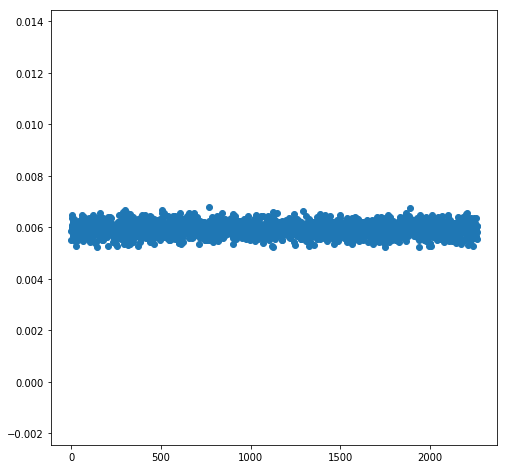

In [168]:
plt.figure(figsize=(8, 8))
plt.scatter(range(n_obs), cook_dists)

Model jest stabilny - żadna pojedyncza obserwacja nie jest wpływowa (małe wartości Cooka) i wszystkie są w małym przedziale.